//anaconda/lib/python3.5/site-packages/hyperion/model/model_output.py:472: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  flux = flux[:, start:end]
//anaconda/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:168: RuntimeWarning: invalid value encountered in true_divide
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


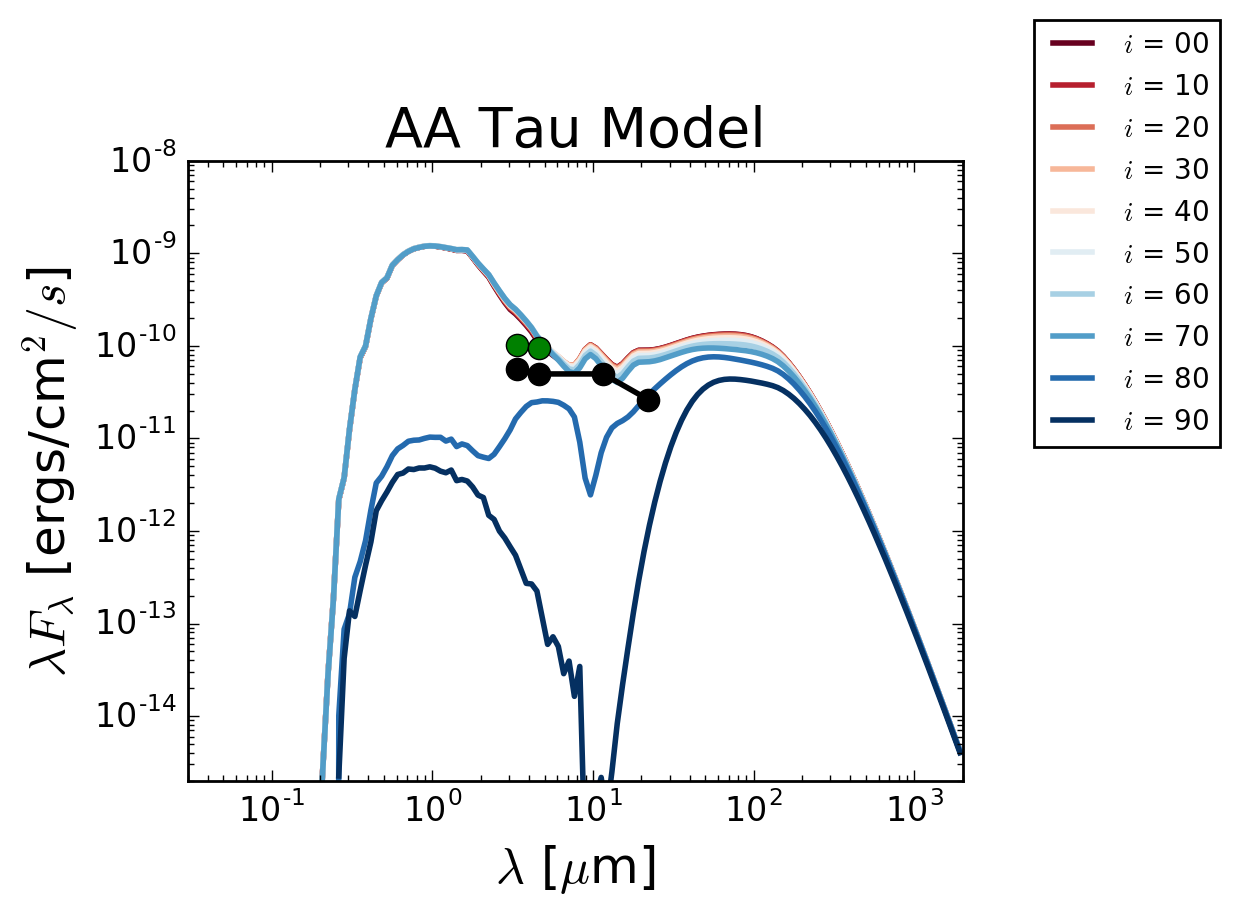

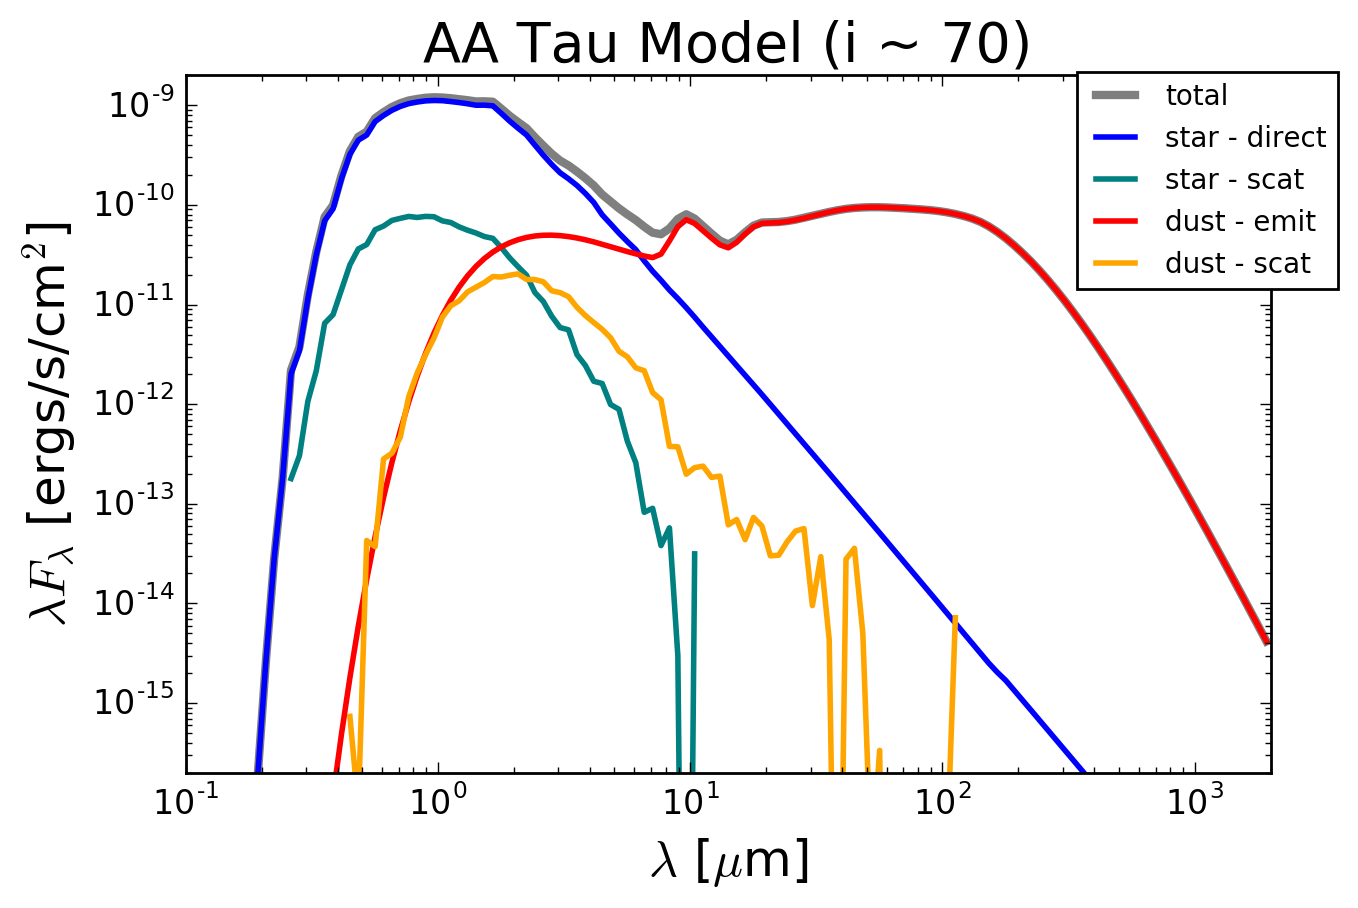

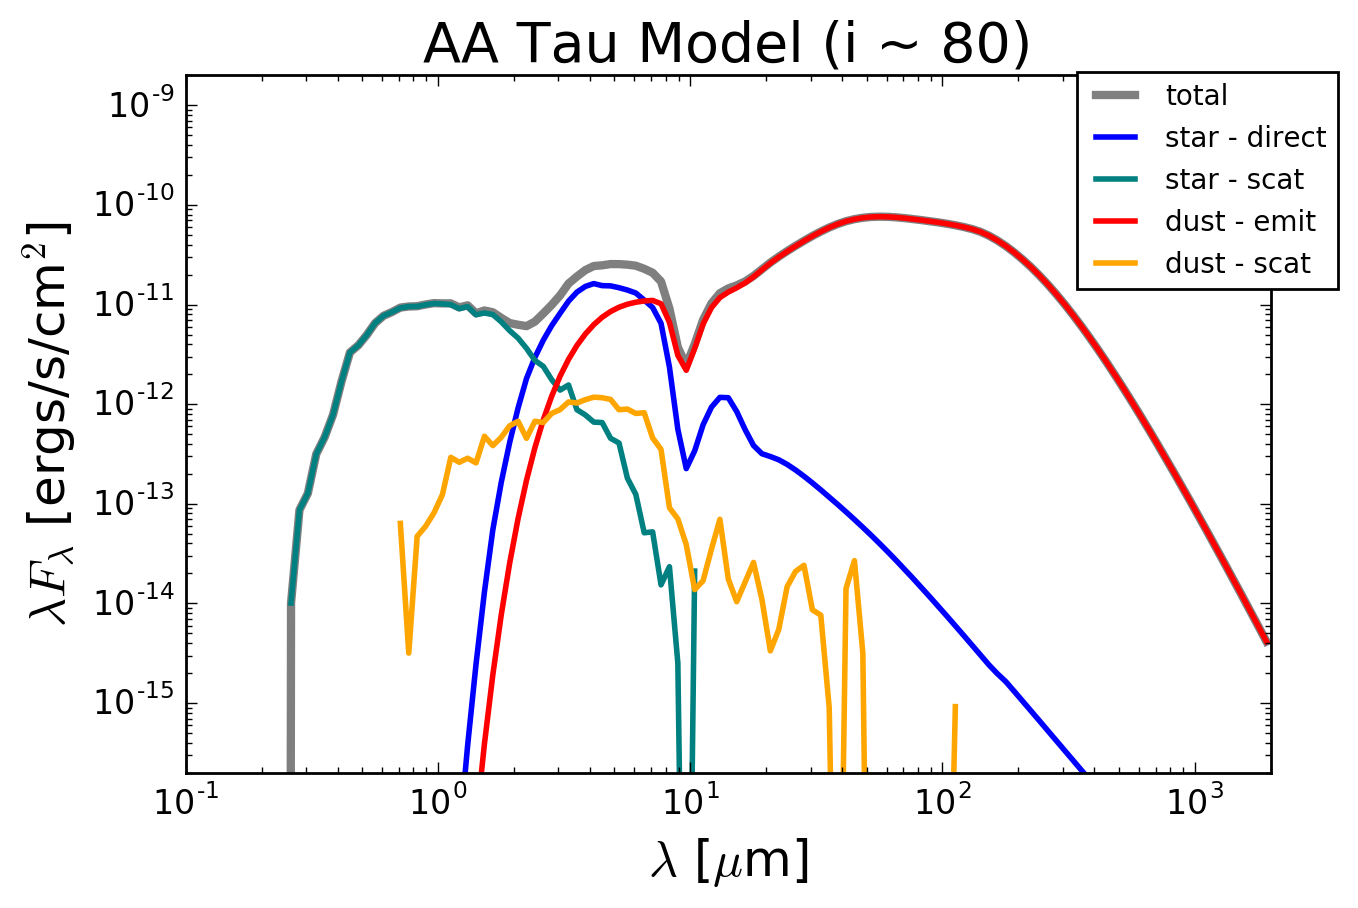

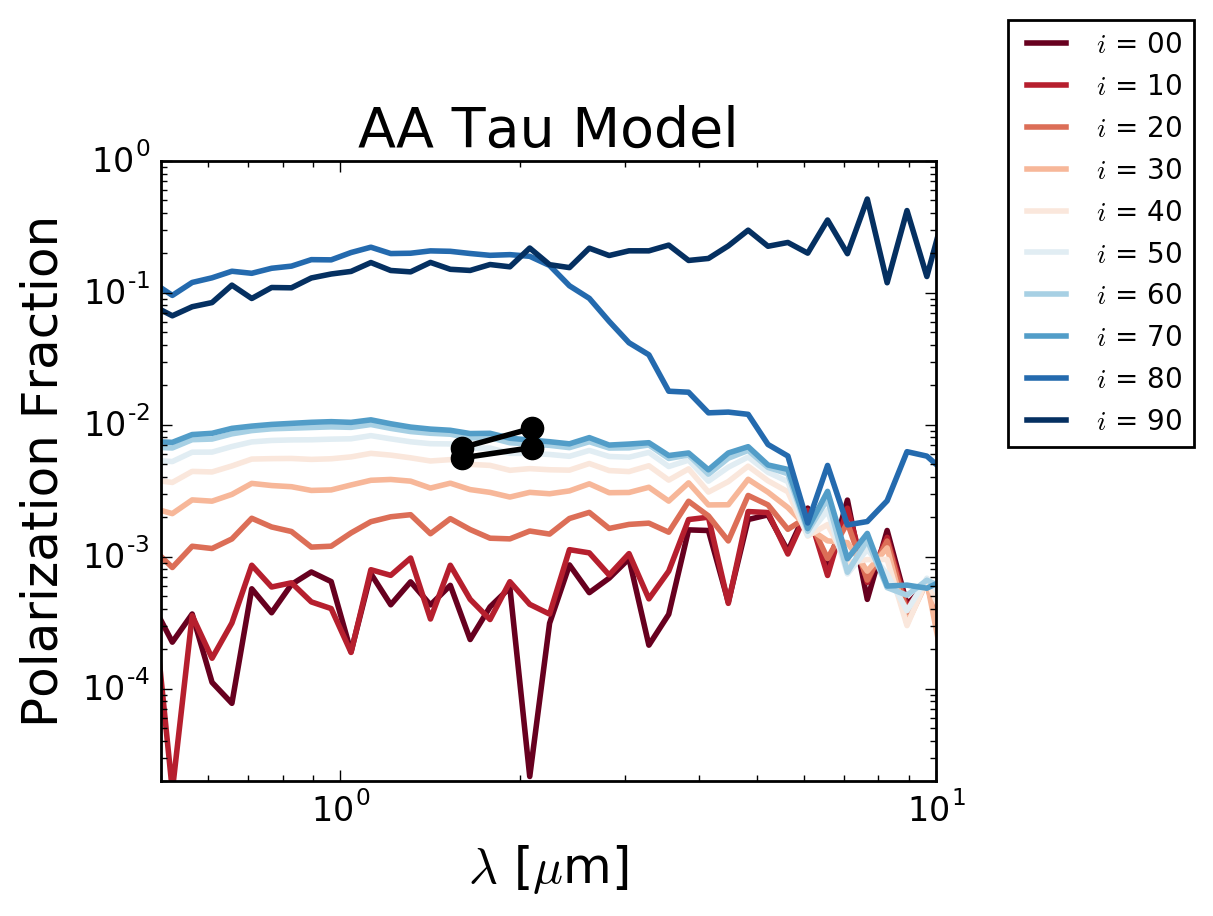

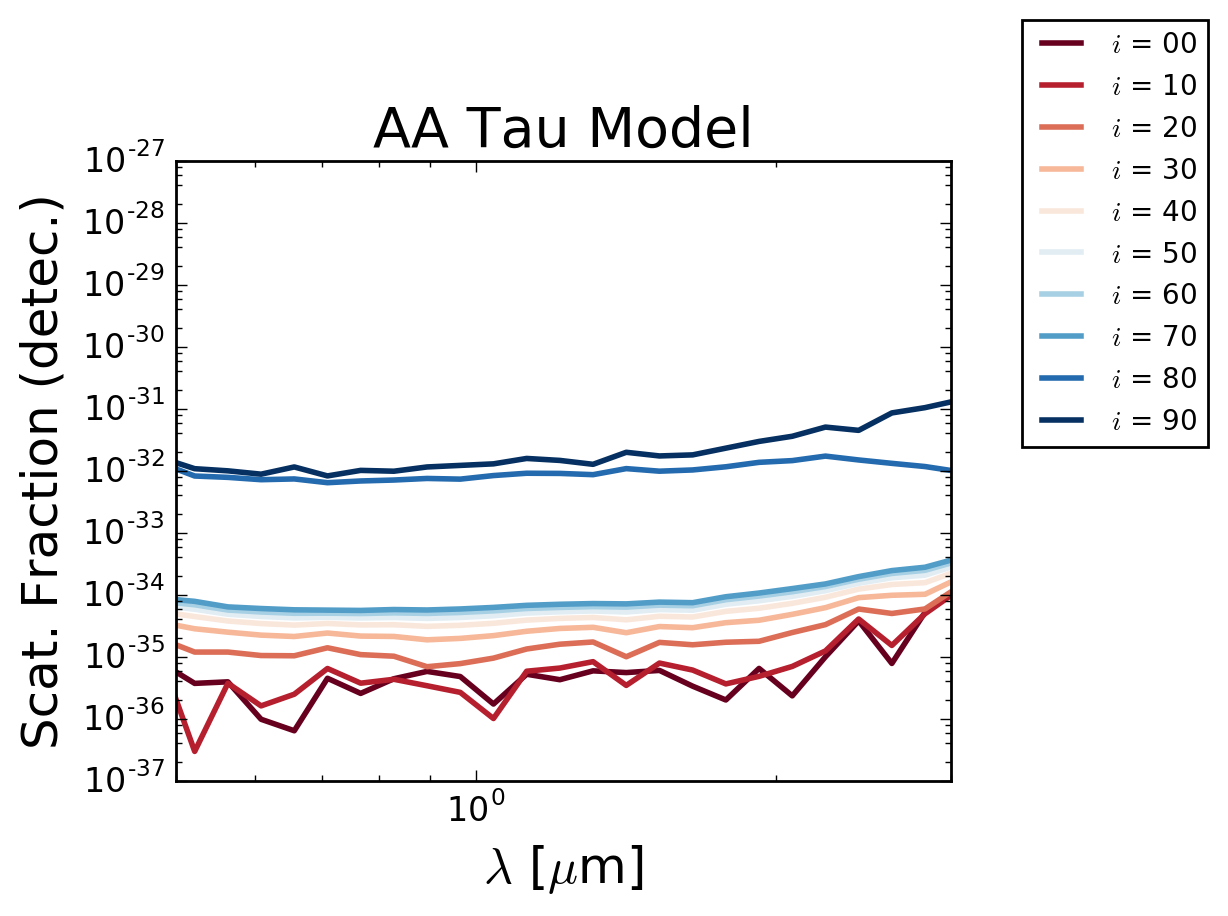

In [24]:
#import packages that we'll use often.
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 10

from hyperion.model import ModelOutput
from hyperion.util.constants import pc

AATau_mo = ModelOutput('AATau_example.rtout')
AATau_sed = AATau_mo.get_sed(aperture=-1, distance=140. * pc)

number = 10
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(AATau_sed.val.shape[0]):
    ax.loglog(AATau_sed.wav, AATau_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
  
lwise=np.array([3.35,4.6,11.56,22.09])
AAtauwise=np.array([8.59E-15,4.77E-15,9.03E-16,6.41E-16]) # erg/s/cm2/A    
AAtauWISEwidths = np.array([6625,10423,55069,41013])
ax.loglog(lwise, AAtauwise*AAtauWISEwidths, marker = 'o', color = 'black')

lneowise=np.array([3.35,4.6])
AAtauneowise=np.array([1.55842E-14,9.18157E-15]) # erg/s/cm2/A
AAtauNEOWISEwidths = np.array([6625,10423])
ax.loglog(lneowise, AAtauneowise*AAtauNEOWISEwidths, marker = 'o', color = 'green')



ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-8)
ax.set_title(r'AA Tau Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('AATau_sed.png', bbox_inches='tight')

fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(1, 1, 1)

# Total SED
sed = AATau_mo.get_sed(inclination=7, aperture=-1, distance=140 * pc)
ax.loglog(sed.wav, sed.val, color='black', lw=3, alpha=0.5, label = 'total')

# Direct stellar photons
sed = AATau_mo.get_sed(inclination=7, aperture=-1, distance=140 * pc,
                       component='source_emit')
ax.loglog(sed.wav, sed.val, color='blue', label = 'star - direct')

# Scattered stellar photons
sed = AATau_mo.get_sed(inclination=7, aperture=-1, distance=140 * pc,
                       component='source_scat')
ax.loglog(sed.wav, sed.val, color='teal', label = 'star - scat')

# Direct dust photons
sed = AATau_mo.get_sed(inclination=7, aperture=-1, distance=140 * pc,
                       component='dust_emit')
ax.loglog(sed.wav, sed.val, color='red', label = 'dust - emit')

# Scattered dust photons
sed = AATau_mo.get_sed(inclination=7, aperture=-1, distance=140 * pc,
                       component='dust_scat')
ax.loglog(sed.wav, sed.val, color='orange', label = 'dust - scat')


handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.075,1.025))


ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/s/cm$^2$]')
ax.set_title(r'AA Tau Model (i ~ 70)')

ax.set_xlim(0.1, 2000.)
ax.set_ylim(2.e-16, 2.e-9)
fig.savefig('AATau_sed_plot_components_70.png')

fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(1, 1, 1)

# Total SED
sed = AATau_mo.get_sed(inclination=8, aperture=-1, distance=140 * pc)
ax.loglog(sed.wav, sed.val, color='black', lw=3, alpha=0.5, label = 'total')

# Direct stellar photons
sed = AATau_mo.get_sed(inclination=8, aperture=-1, distance=140 * pc,
                       component='source_emit')
ax.loglog(sed.wav, sed.val, color='blue', label = 'star - direct')

# Scattered stellar photons
sed = AATau_mo.get_sed(inclination=8, aperture=-1, distance=140 * pc,
                       component='source_scat')
ax.loglog(sed.wav, sed.val, color='teal', label = 'star - scat')

# Direct dust photons
sed = AATau_mo.get_sed(inclination=8, aperture=-1, distance=140 * pc,
                       component='dust_emit')
ax.loglog(sed.wav, sed.val, color='red', label = 'dust - emit')

# Scattered dust photons
sed = AATau_mo.get_sed(inclination=8, aperture=-1, distance=140 * pc,
                       component='dust_scat')
ax.loglog(sed.wav, sed.val, color='orange', label = 'dust - scat')


handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.075,1.025))


ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/s/cm$^2$]')
ax.set_title(r'AA Tau Model (i ~ 80)')

ax.set_xlim(0.1, 2000.)
ax.set_ylim(2.e-16, 2.e-9)
fig.savefig('AATau_sed_plot_components_80.png')
AATau_sed_pol = AATau_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(AATau_sed.val.shape[0]):
    ax.loglog(AATau_sed_pol.wav, AATau_sed_pol.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([1.6,2.1],[0.0056,0.0067], marker = 'o', color='black')
ax.loglog([1.6,2.1],[0.0067,0.0094], marker = 'o', color='black')


    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'AA Tau Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('AATau_sed_linpol.png', bbox_inches='tight')

AATau_sed_for_scat = AATau_mo.get_sed(aperture=-1)

AATau_sed_scat = AATau_mo.get_sed(aperture=-1, component = 'source_scat', stokes='linpol')

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(AATau_sed.val.shape[0]):
    ax.loglog(AATau_sed_for_scat.wav, AATau_sed_scat.val[i, :]/AATau_sed_for_scat.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

ax.set_xlim(0.5, 3.)
#ax.set_ylim(0.0001,1)
ax.set_title(r'AA Tau Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Scat. Fraction (detec.)')
fig.savefig('AATau_sed_scat.png', bbox_inches='tight')

//anaconda/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)
//anaconda/lib/python3.5/site-packages/hyperion/model/model_output.py:472: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  flux = flux[:, start:end]
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in true_divide
//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


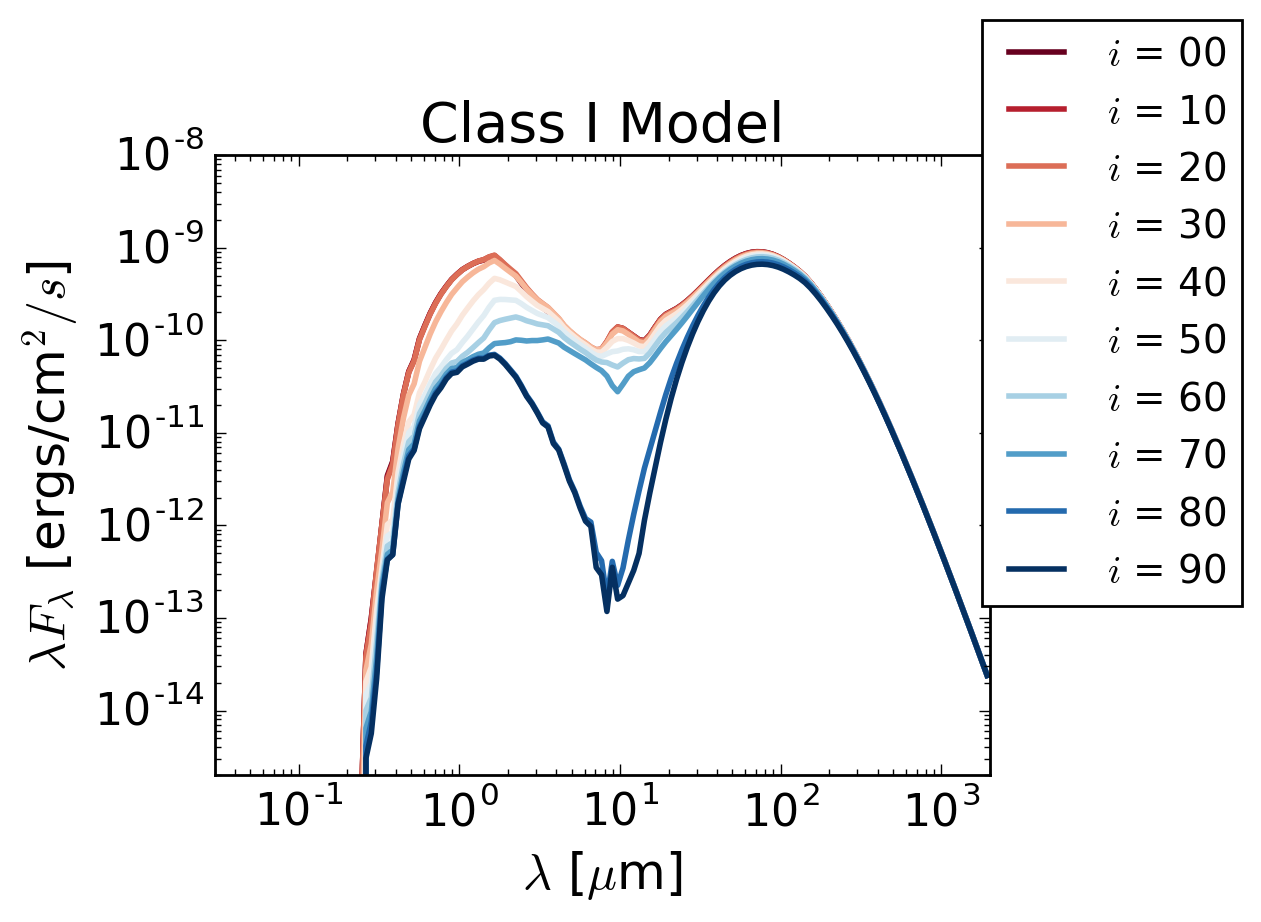

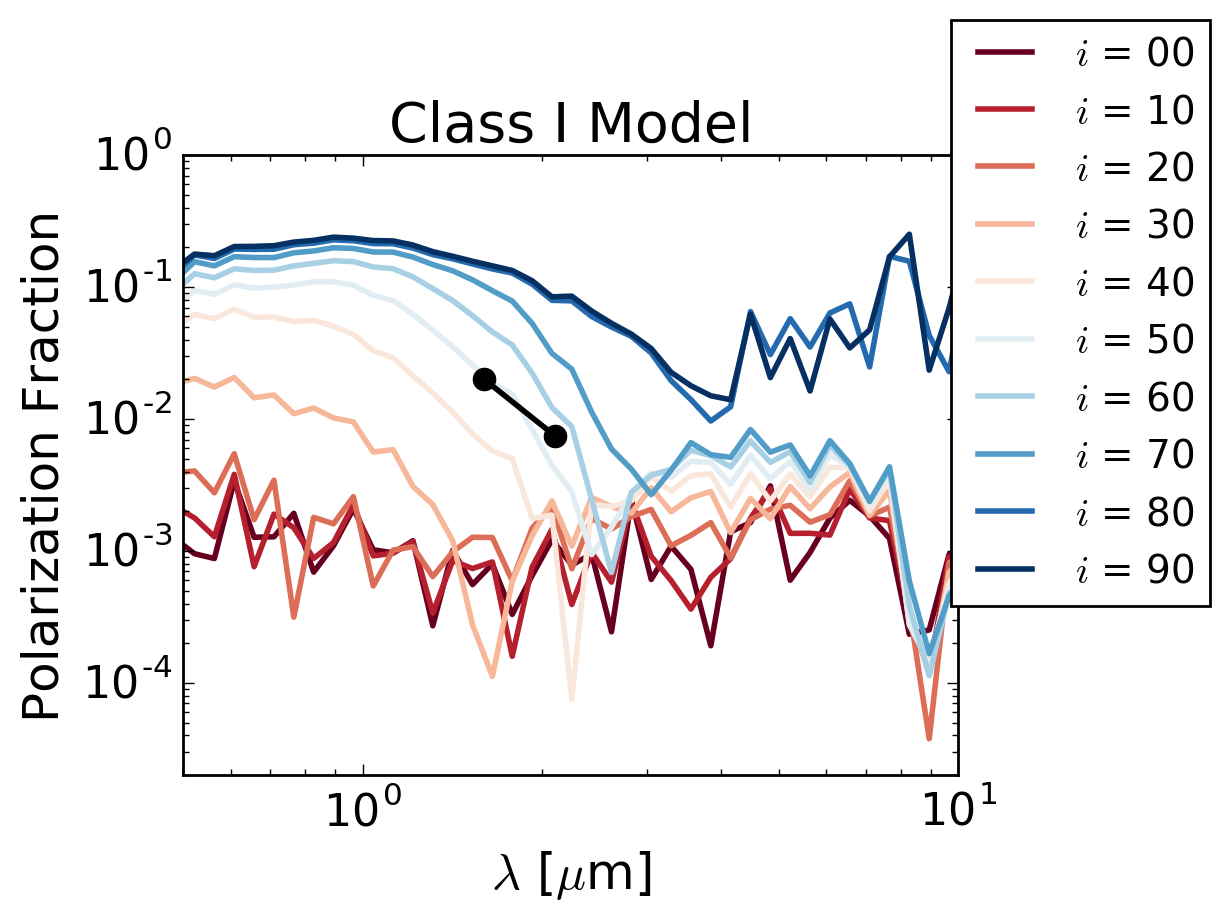

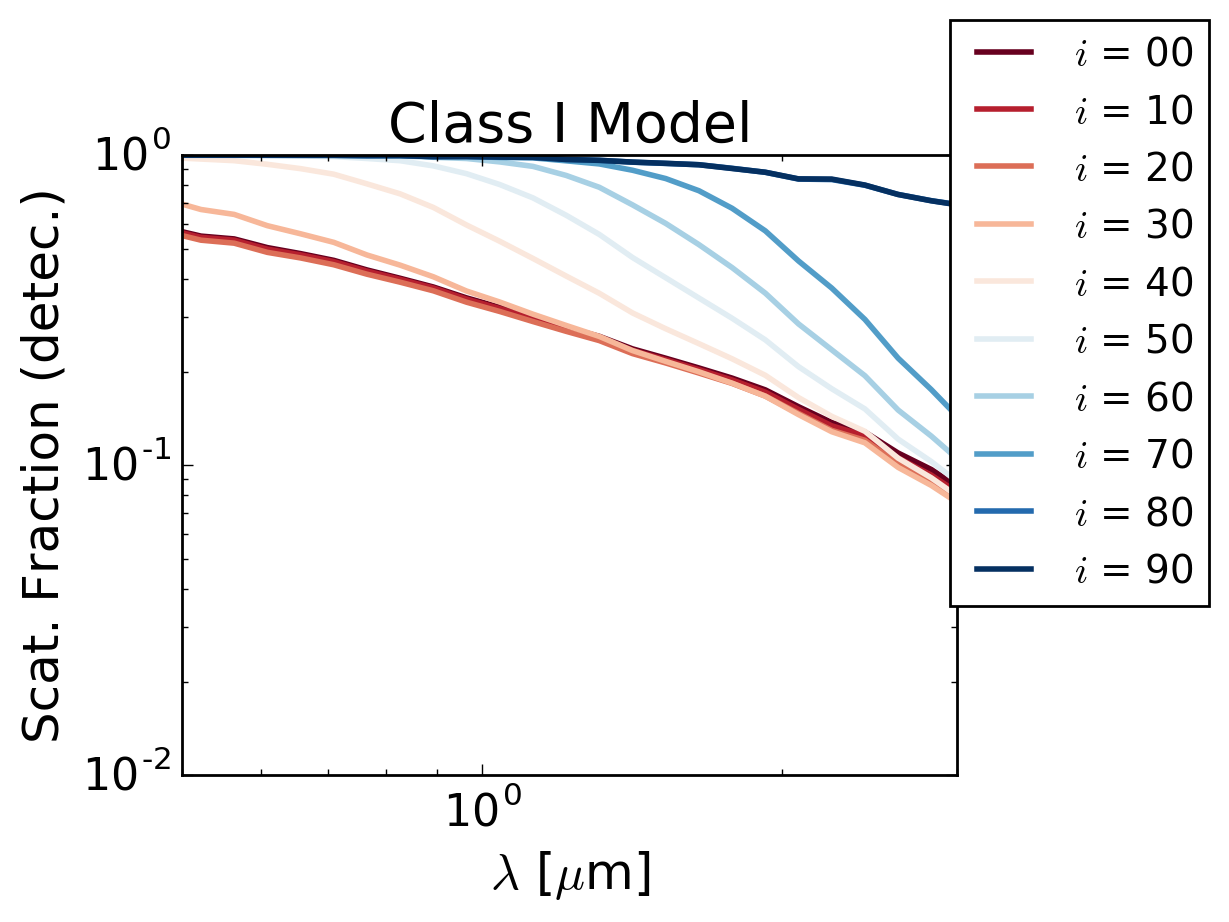

In [7]:
class1_mo = ModelOutput('class1_example.rtout')
class1_sed = class1_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(class1_sed.val.shape[0]):
    ax.loglog(class1_sed.wav, class1_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-8)
ax.set_title(r'Class I Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('class1_example_sed.png', bbox_inches='tight')

class1_sed_pol = class1_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(class1_sed.val.shape[0]):
    ax.loglog(class1_sed_pol.wav, class1_sed_pol.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([1.6,2.1],[0.02,0.0075], marker = 'o', color='black')


handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'Class I Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('class1_example_sed_linpol.png', bbox_inches='tight')

class1_sed_scat = class1_mo.get_sed(distance = 140. * pc, aperture=-1, component = 'source_scat')

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(class1_sed.val.shape[0]):
    ax.loglog(class1_sed.wav, class1_sed_scat.val[i, :]/class1_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
    #ax.loglog(class1_sed_scat.wav, class1_sed_scat.val[i, :], color = colors[i], linestyle = '--')


    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

ax.set_xlim(0.5, 3.)
ax.set_ylim(0.01,1)
ax.set_title(r'Class I Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Scat. Fraction (detec.)')
fig.savefig('class1_example_sed_scat.png', bbox_inches='tight')

/Users/kcovey/anaconda3/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)


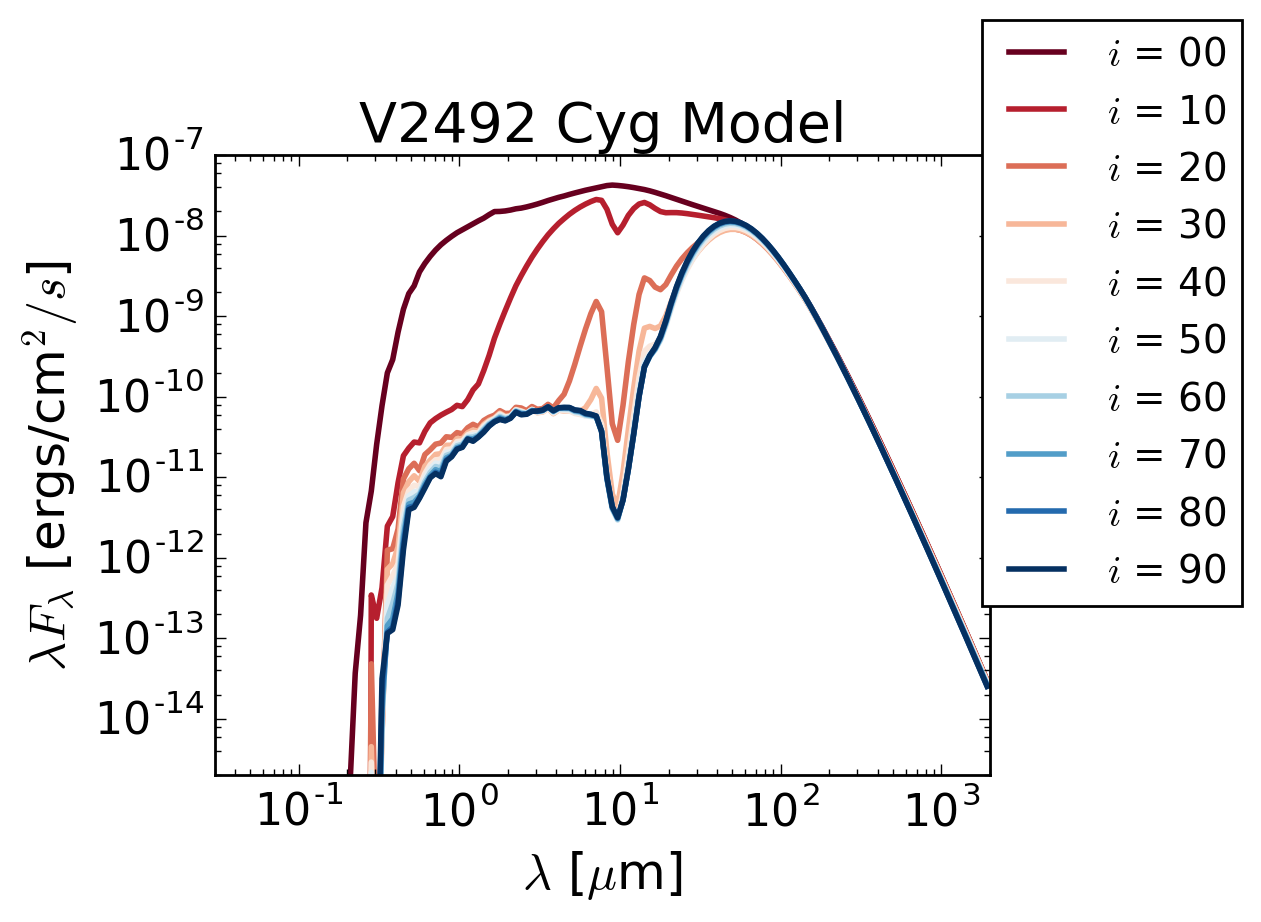

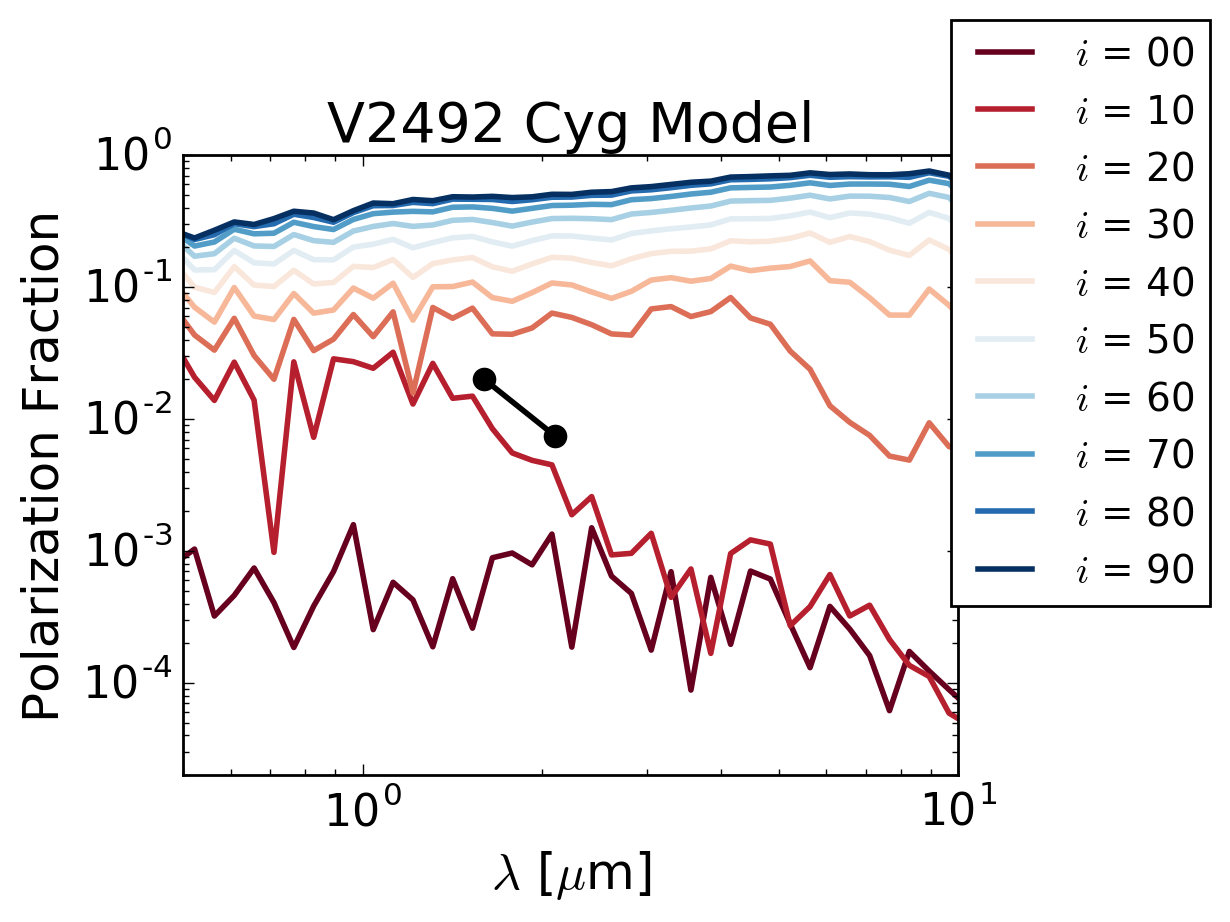

In [10]:
v2492_mo = ModelOutput('v2492_Cyg.rtout')
v2492_sed = v2492_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(v2492_sed.val.shape[0]):
    ax.loglog(v2492_sed.wav, v2492_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'V2492 Cyg Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('V2492_Cyg_example_sed.png', bbox_inches='tight')

v2492_sed = v2492_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(v2492_sed.val.shape[0]):
    ax.loglog(v2492_sed.wav, v2492_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([1.6,2.1],[0.02,0.0075], marker = 'o', color='black')


handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'V2492 Cyg Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('V2492_Cyg_example_sed_linpol.png', bbox_inches='tight')

In [ ]:
L1551_mo = ModelOutput('L1551_IRS.rtout')
L1551_sed = L1551_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(L1551_sed.val.shape[0]):
    ax.loglog(L1551_sed.wav, L1551_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'L1551 IRS Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('L1551_example_sed.png', bbox_inches='tight')

L1551_sed = L1551_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(L1551_sed.val.shape[0]):
    ax.loglog(L1551_sed.wav, L1551_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([2.15,2.15],[0.23,0.23], marker = 'o', color='black')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'L1551 IRS5 Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('L1551_example_sed_linpol.png', bbox_inches='tight')

/Users/kcovey/anaconda3/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)


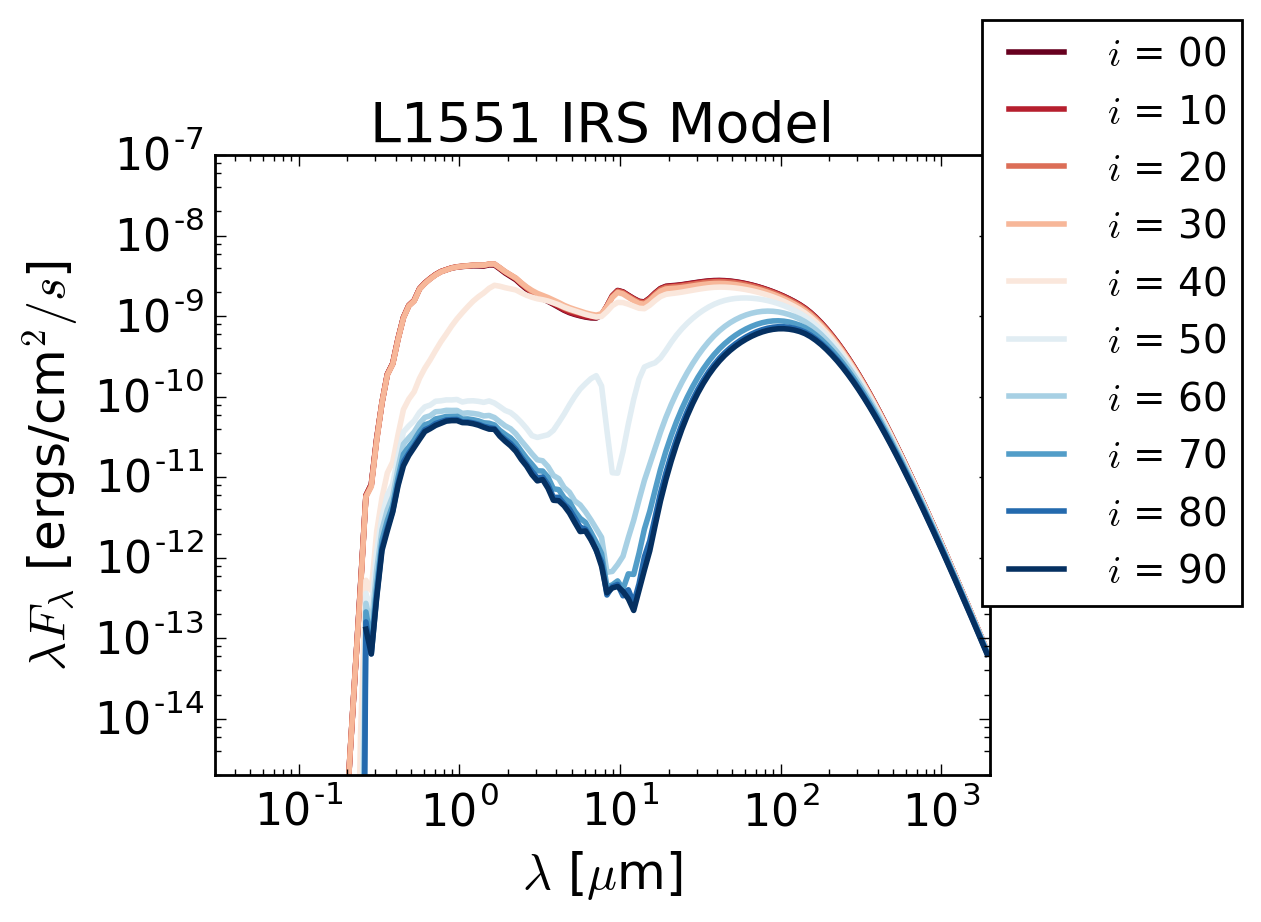

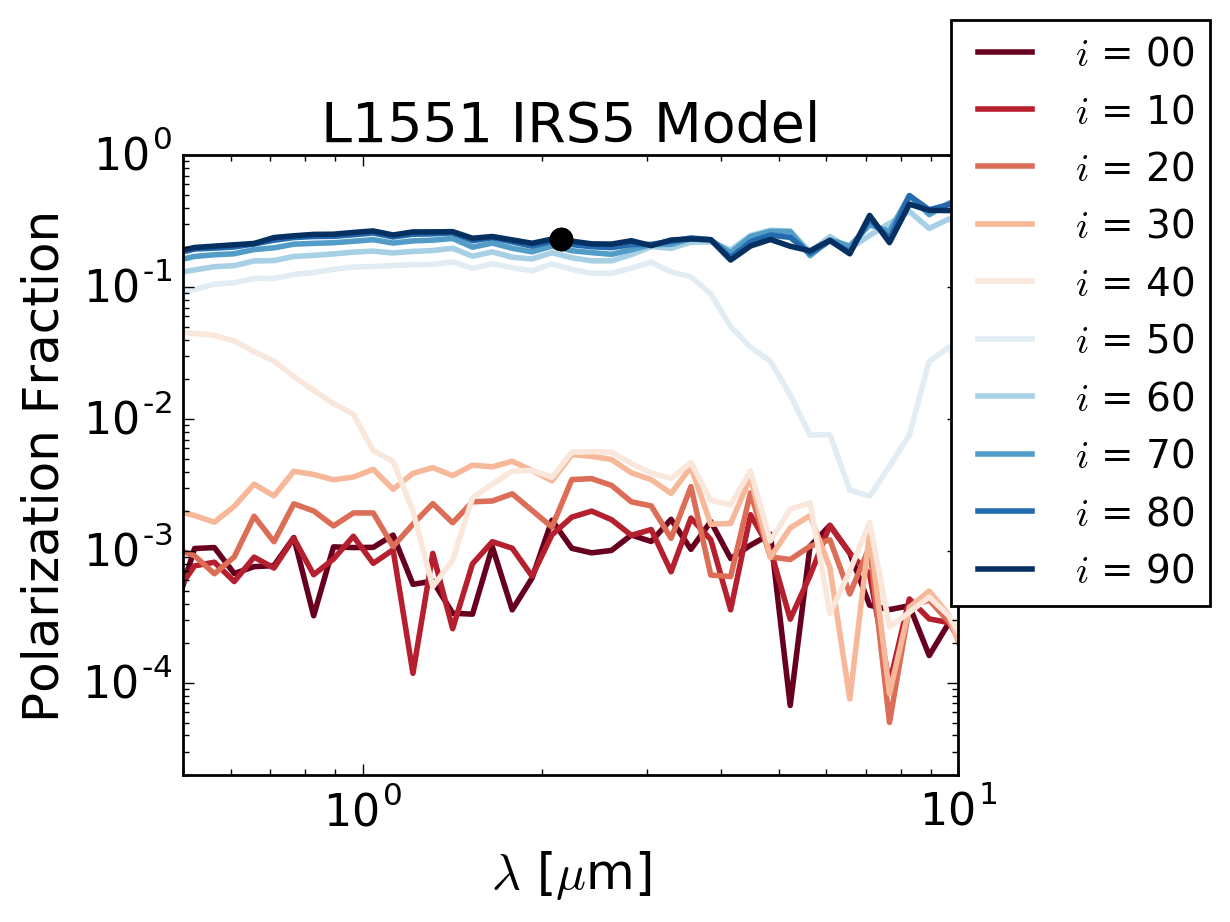

In [11]:
L1551_mo = ModelOutput('L1551_IRS.rtout')
L1551_sed = L1551_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(L1551_sed.val.shape[0]):
    ax.loglog(L1551_sed.wav, L1551_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'L1551 IRS Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('L1551_example_sed.png', bbox_inches='tight')

L1551_sed = L1551_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(L1551_sed.val.shape[0]):
    ax.loglog(L1551_sed.wav, L1551_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([2.15,2.15],[0.23,0.23], marker = 'o', color='black')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'L1551 IRS5 Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('L1551_example_sed_linpol.png', bbox_inches='tight')

/Users/kcovey/anaconda3/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)


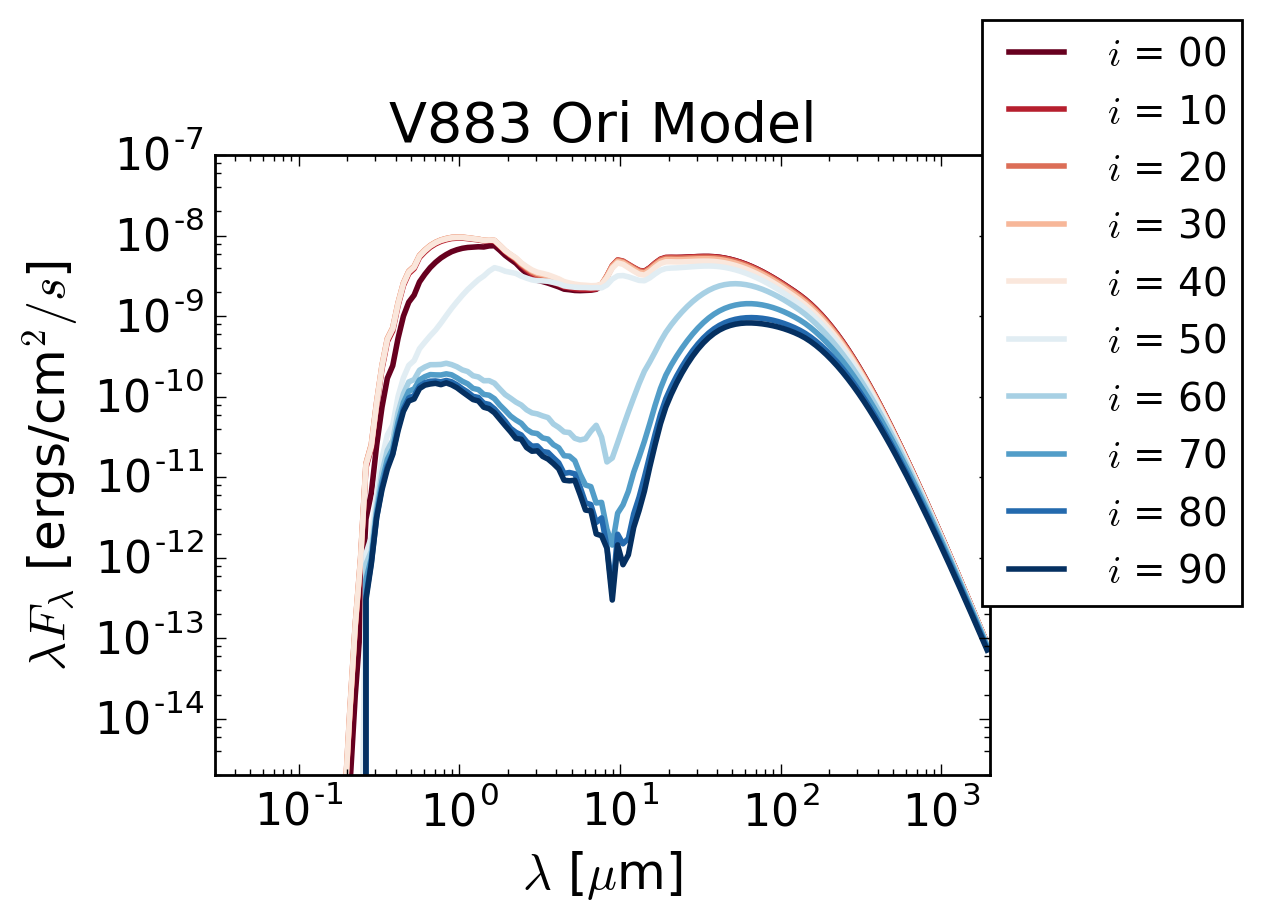

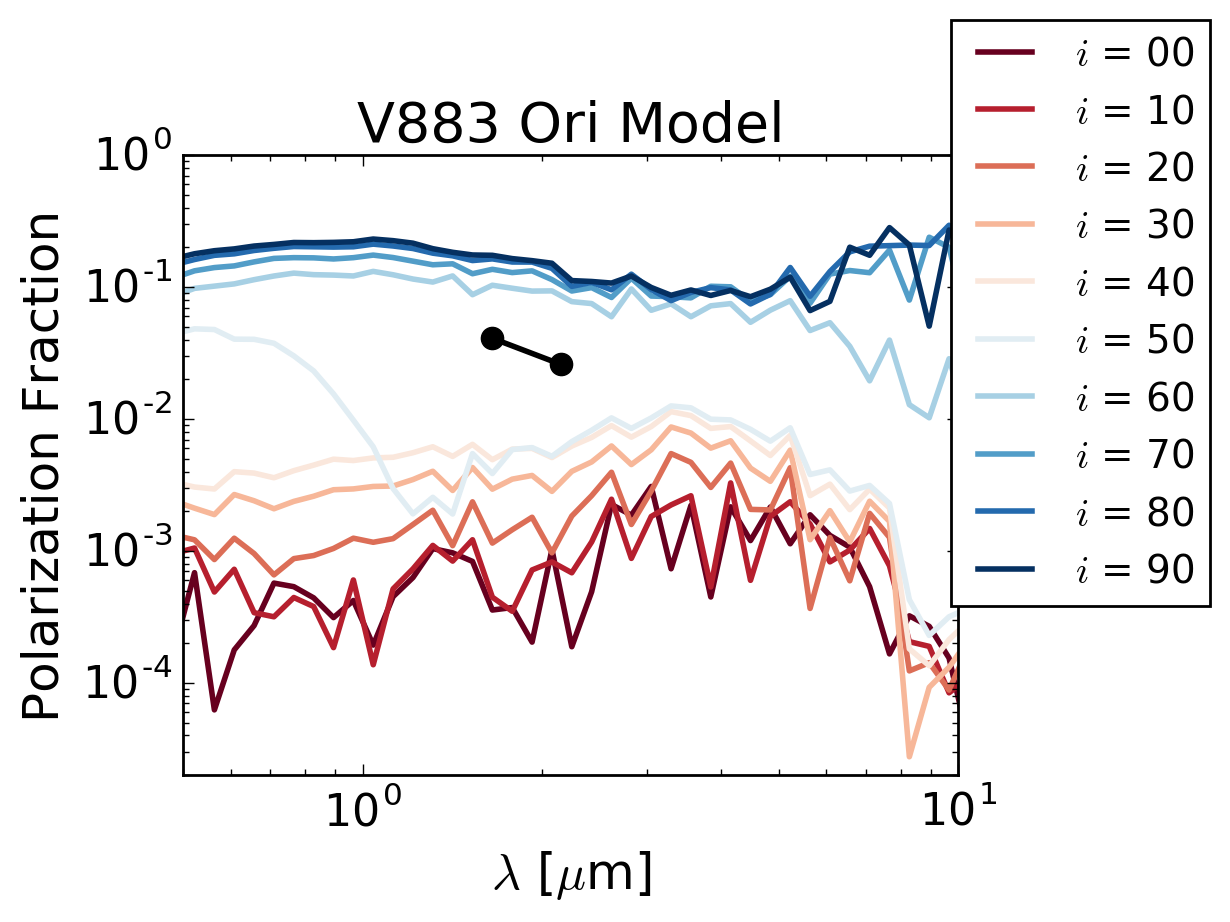

In [13]:
V883_Ori_mo = ModelOutput('V883_Ori.rtout')
V883_Ori_sed = V883_Ori_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(V883_Ori_sed.val.shape[0]):
    ax.loglog(V883_Ori_sed.wav, V883_Ori_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'V883 Ori Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('V883_Ori_sed.png', bbox_inches='tight')

V883_Ori_sed = V883_Ori_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(V883_Ori_sed.val.shape[0]):
    ax.loglog(V883_Ori_sed.wav, V883_Ori_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([1.65,2.15],[0.041,0.026], marker = 'o', color='black')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'V883 Ori Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('V883_Ori_sed_linpol.png', bbox_inches='tight')

/Users/kcovey/anaconda3/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)


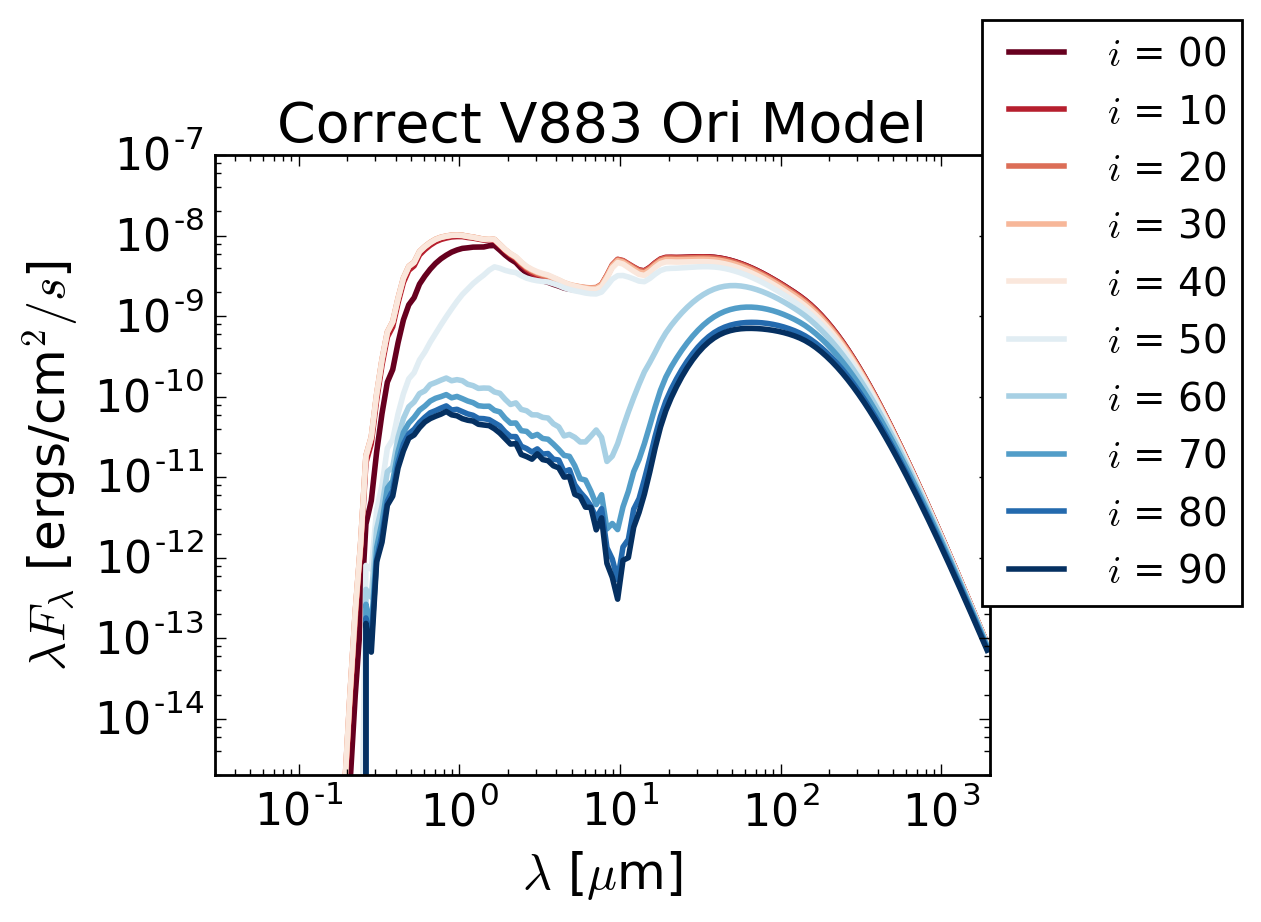

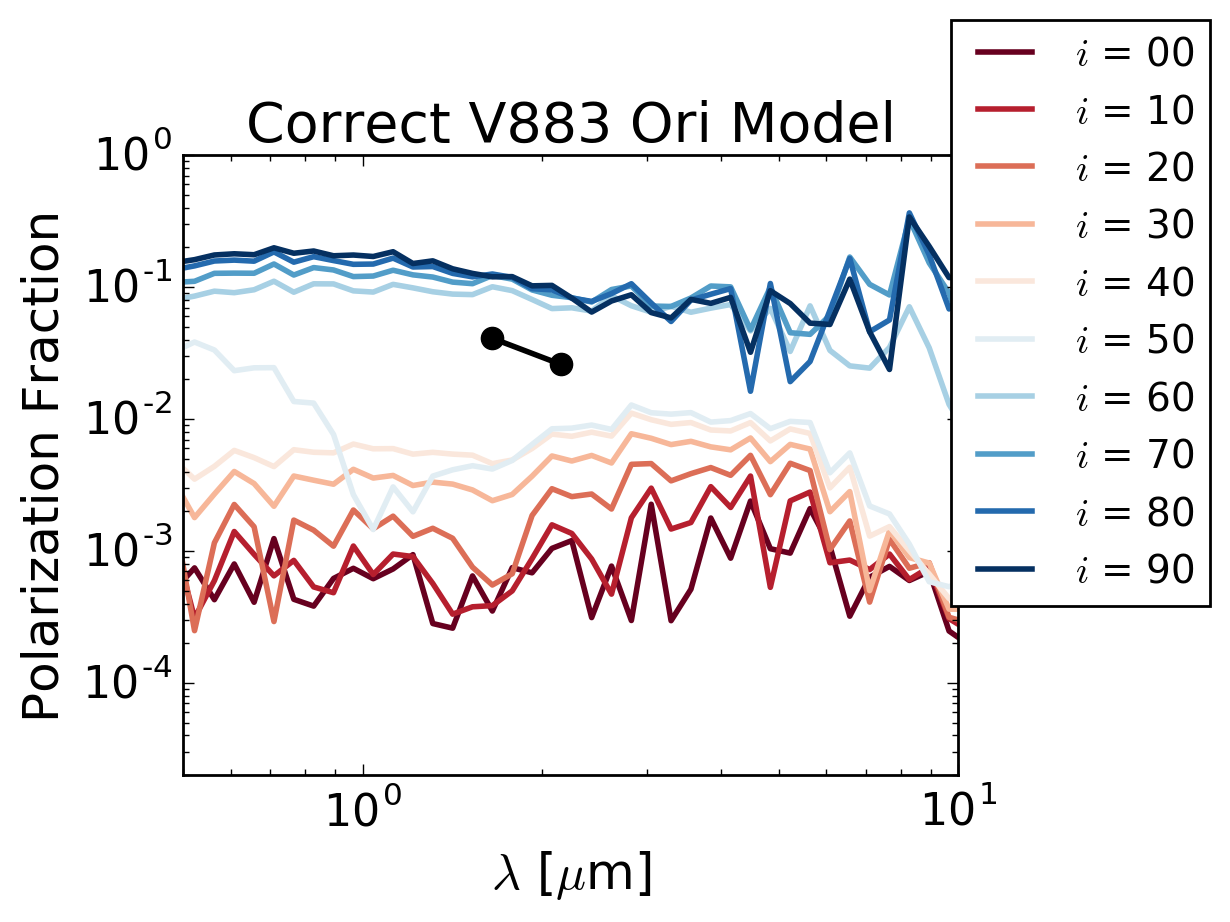

In [14]:
V883_Ori_mo = ModelOutput('V883_Ori_lowerMdot.rtout')
V883_Ori_sed = V883_Ori_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(V883_Ori_sed.val.shape[0]):
    ax.loglog(V883_Ori_sed.wav, V883_Ori_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'Correct V883 Ori Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('V883_Ori_lowerMdot_sed.png', bbox_inches='tight')

V883_Ori_sed = V883_Ori_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(V883_Ori_sed.val.shape[0]):
    ax.loglog(V883_Ori_sed.wav, V883_Ori_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([1.65,2.15],[0.041,0.026], marker = 'o', color='black')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'Correct V883 Ori Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('V883_Ori_lowerMdot_sed_linpol.png', bbox_inches='tight')

/Users/kcovey/anaconda3/lib/python3.5/site-packages/hyperion/model/model_output.py:500: RuntimeWarning: invalid value encountered in true_divide
  flux = np.sqrt((flux[1] ** 2 + flux[2] ** 2) / flux[0] ** 2)


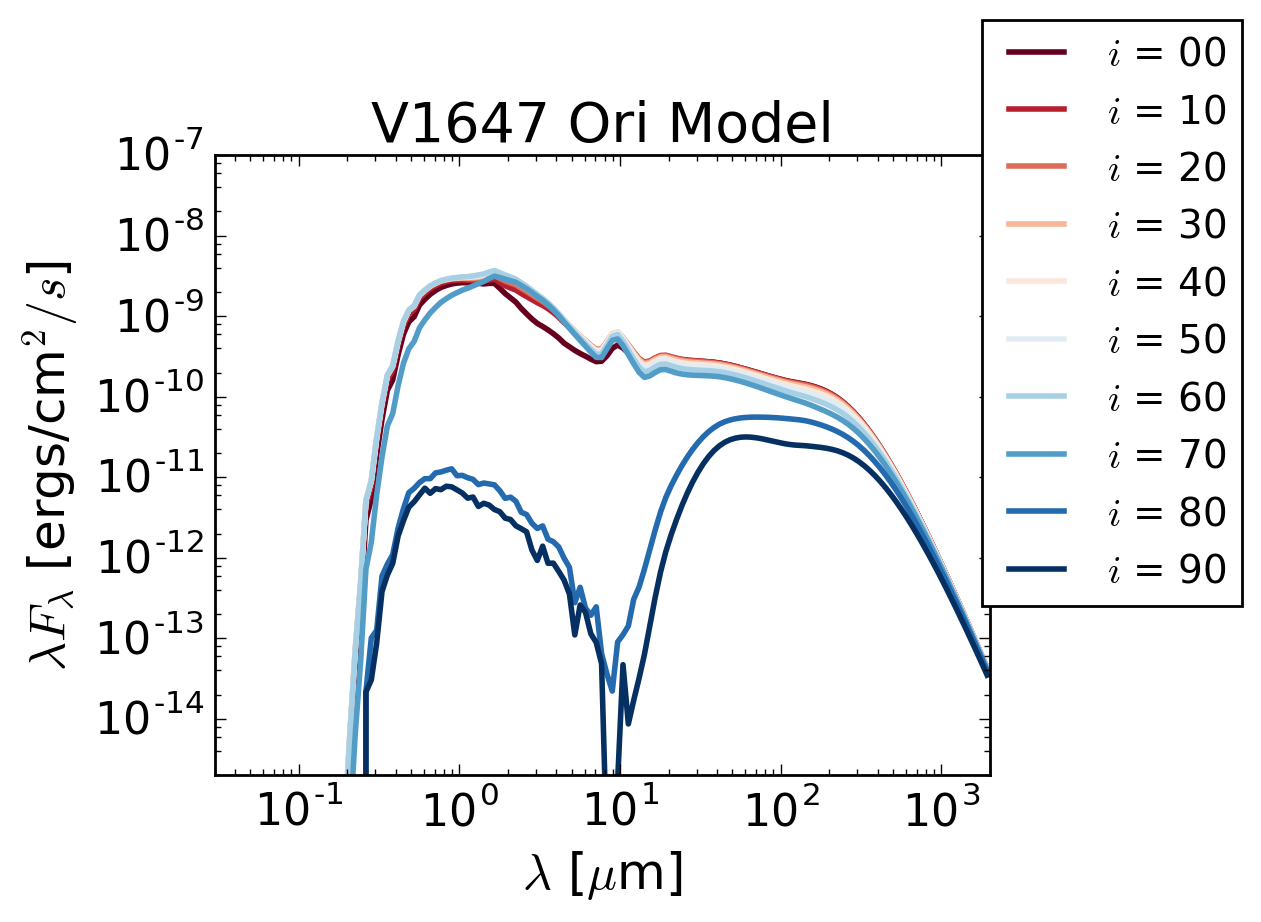

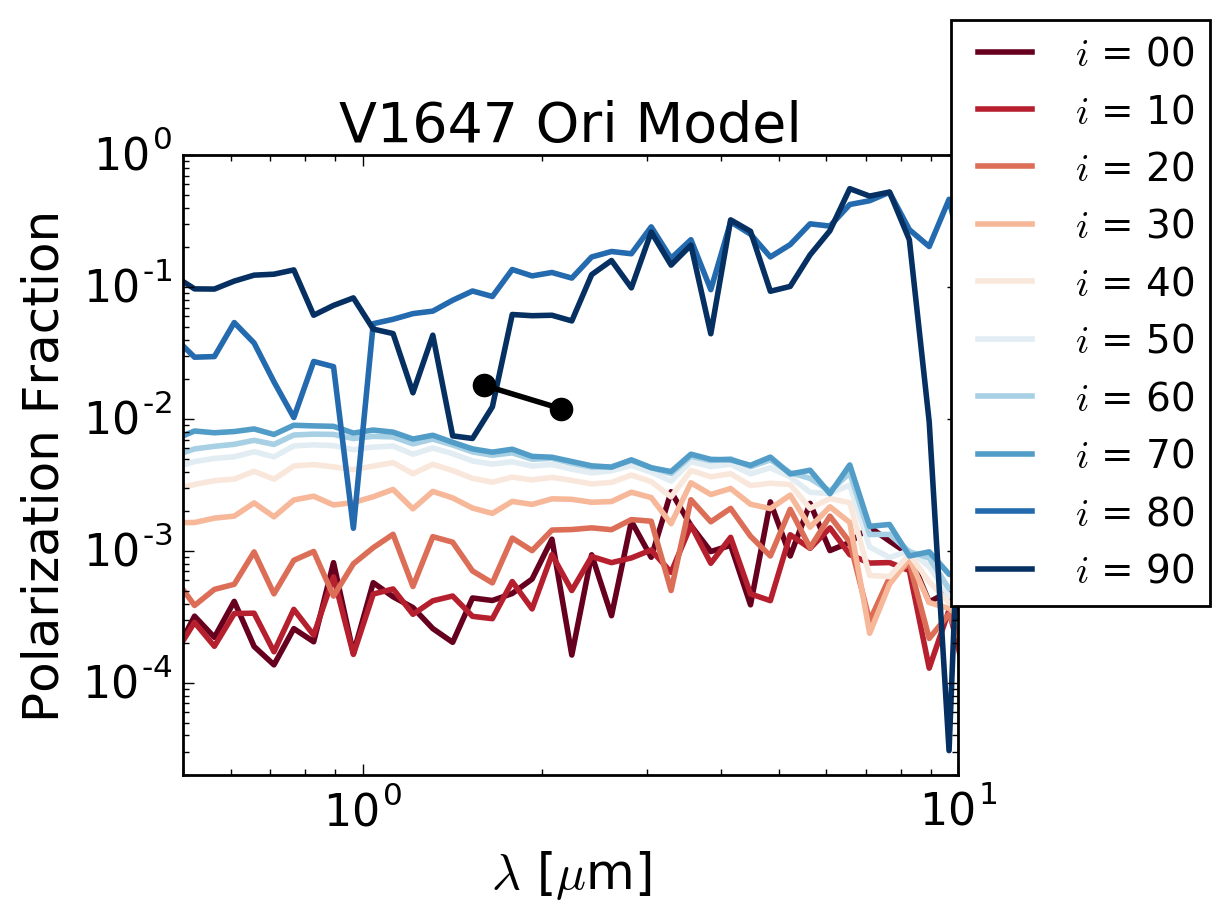

In [15]:
V1647_Ori_mo = ModelOutput('V1647_Ori.rtout')
V1647_Ori_sed = V1647_Ori_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(V1647_Ori_sed.val.shape[0]):
    ax.loglog(V1647_Ori_sed.wav, V1647_Ori_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'V1647 Ori Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('V1647_Ori_sed.png', bbox_inches='tight')

V1647_Ori_sed = V1647_Ori_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(V1647_Ori_sed.val.shape[0]):
    ax.loglog(V1647_Ori_sed.wav, V1647_Ori_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([1.6,2.15],[0.018,0.012], marker = 'o', color='black')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'V1647 Ori Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('V1647_Ori_sed_linpol.png', bbox_inches='tight')

In [ ]:
PP13S_mo = ModelOutput('PP13S.rtout')
PP13S_sed = PP13S_mo.get_sed(aperture=-1, distance=140. * pc)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
for i in range(PP13S_sed.val.shape[0]):
    ax.loglog(PP13S_sed.wav, PP13S_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))
    
ax.set_xlim(0.03, 2000.)
ax.set_ylim(2.e-15, 1e-7)
ax.set_title(r'PP13S Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]')
fig.savefig('PP13S_sed.png', bbox_inches='tight')

PP13S_sed = PP13S_mo.get_sed(stokes='linpol', aperture=-1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

for i in range(PP13S_sed.val.shape[0]):
    ax.loglog(PP13S_sed.wav, PP13S_sed.val[i, :], color = colors[i], label = '$i$ = {:02.0f}'.format(i*10))
ax.loglog([2.15,2.15],[0.15,0.15], marker = 'o', color='black')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.35,1.25))

    #ax.loglog(sed.wav, sed.val.transpose(), color='black')
ax.set_xlim(0.5, 10.)
ax.set_ylim(2.e-5, 1)
ax.set_title(r'PP13S Model')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'Polarization Fraction')
fig.savefig('PP13S_sed_linpol.png', bbox_inches='tight')